<a href="https://www.kaggle.com/code/alexacassidyy/notebookb377adba58?scriptVersionId=112395739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

sb.set(rc={'figure.figsize':(20,8)})



df = pd.read_csv('../input/spaceship-titanic/train.csv')
dft = pd.read_csv('../input/spaceship-titanic/test.csv')

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df.info()
df.var()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:>

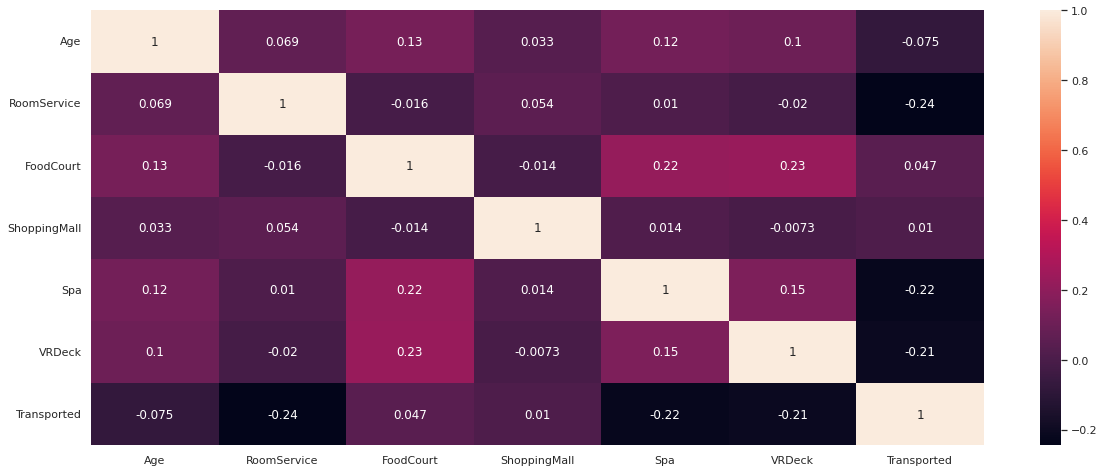

In [3]:
sb.heatmap(df.corr(), annot=True)

In [4]:
df.iloc[df[(df.isnull().sum(axis=1) >=3)].index]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1203,1284_01,Mars,True,F/247/S,NaN,NaN,False,0.0,NaN,0.0,0.0,0.0,Hal Knité,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
2762,2970_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,740.0,82.0,6.0,NaN,1.0,Dwin Adkinson,False
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False
3535,3790_01,NaN,True,G/620/P,TRAPPIST-1e,13.0,False,0.0,NaN,0.0,NaN,0.0,Trick Meyersones,True
3882,4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
4164,4446_05,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,NaN,True
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True
5409,5777_01,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False


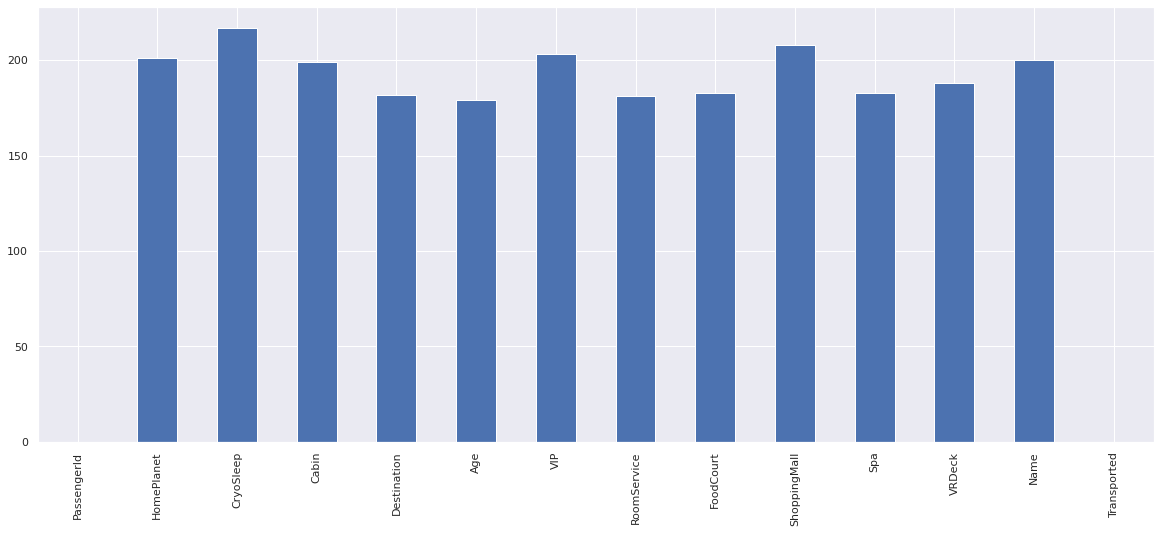

In [5]:
df.isnull().sum().plot.bar()
plt.show()

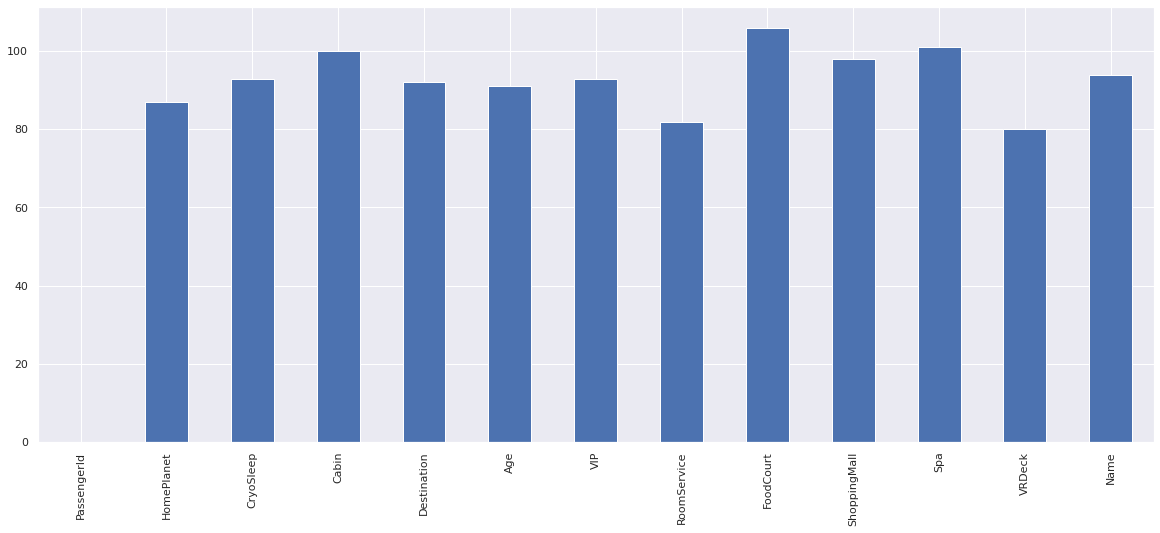

In [6]:
dft.isnull().sum().plot.bar()
plt.show()

In [7]:
df.iloc[df[(df.isnull().sum(axis=1) >=3)].index]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1203,1284_01,Mars,True,F/247/S,NaN,NaN,False,0.0,NaN,0.0,0.0,0.0,Hal Knité,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
2762,2970_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,740.0,82.0,6.0,NaN,1.0,Dwin Adkinson,False
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False
3535,3790_01,NaN,True,G/620/P,TRAPPIST-1e,13.0,False,0.0,NaN,0.0,NaN,0.0,Trick Meyersones,True
3882,4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
4164,4446_05,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,NaN,True
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True
5409,5777_01,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False


In [8]:
df.duplicated().sum()

dft.duplicated().sum()

0

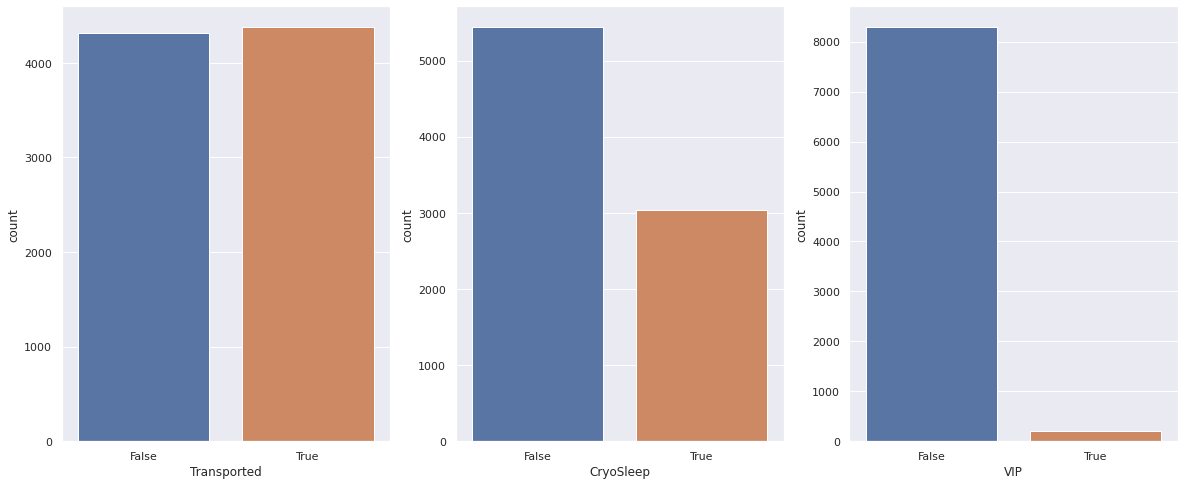

In [9]:
figure, ax =plt.subplots(1,3)
sb.countplot(data=df, x='Transported', ax=ax[0])
sb.countplot(data=df, x='CryoSleep', ax=ax[1])
sb.countplot(data=df, x='VIP', ax=ax[2])
figure.show()

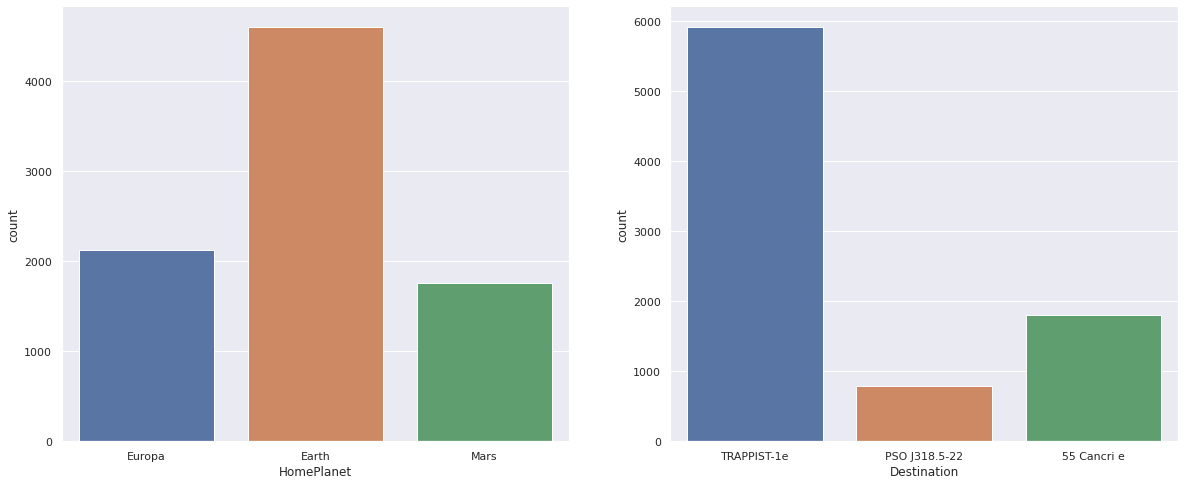

In [10]:
df['VIP'].describe()

figure, ax =plt.subplots(1,2)
sb.countplot(data=df, x='HomePlanet', ax=ax[0])
sb.countplot(data=df, x='Destination', ax=ax[1])
figure.show()

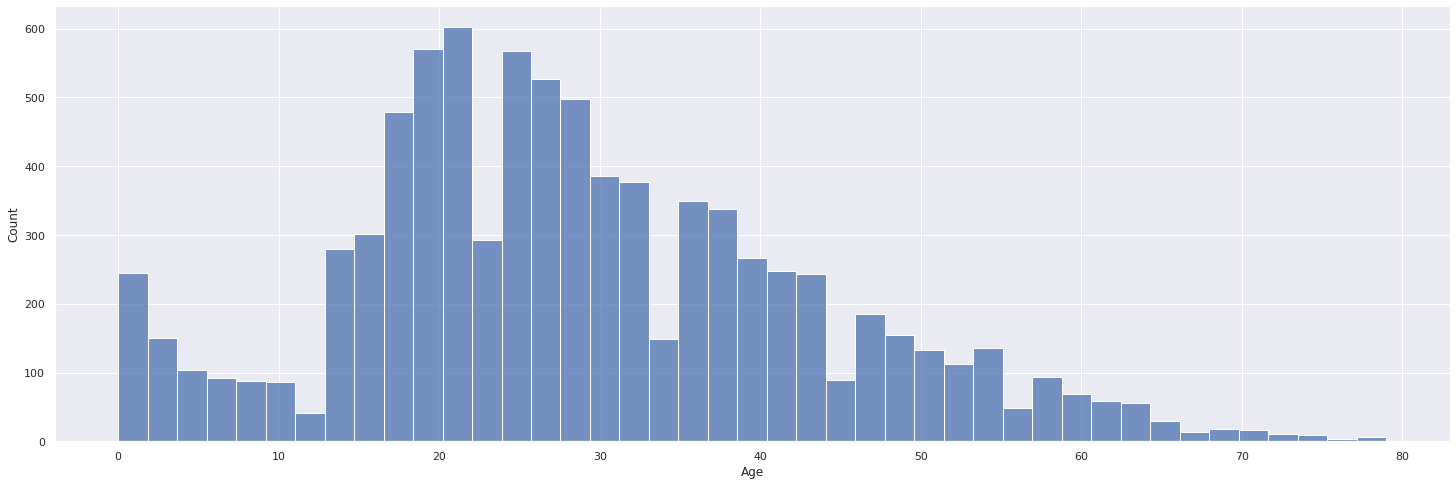

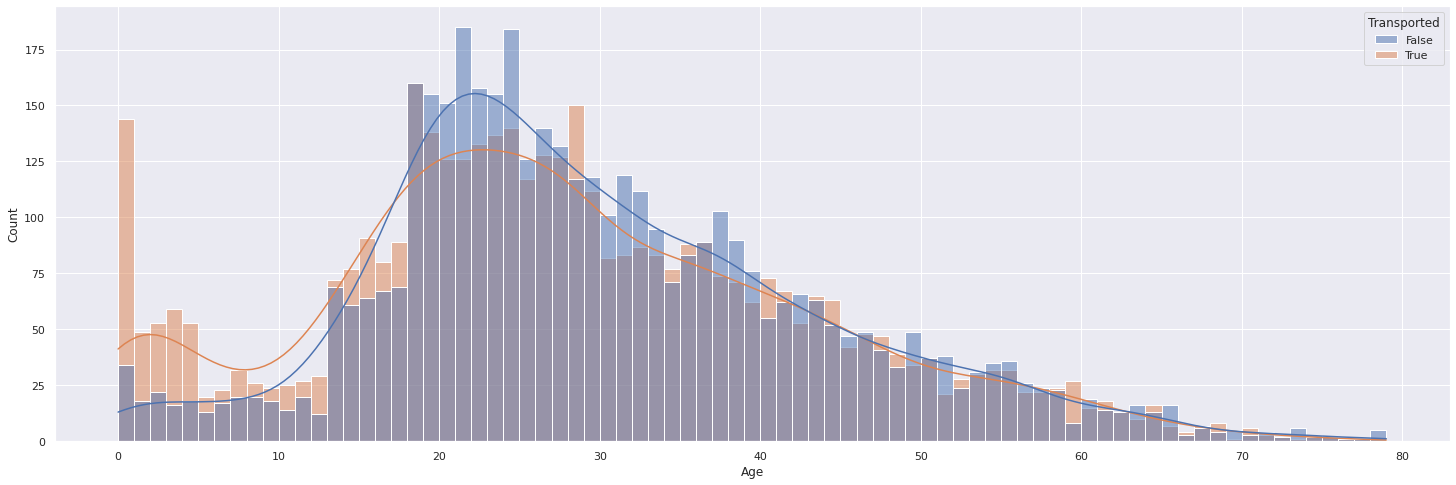

In [11]:
sb.set(rc={'figure.figsize':(25,8)})
sb.histplot(data=df, x='Age')
plt.show()

sb.set(rc={'figure.figsize':(25,8)})
sb.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)
plt.show()

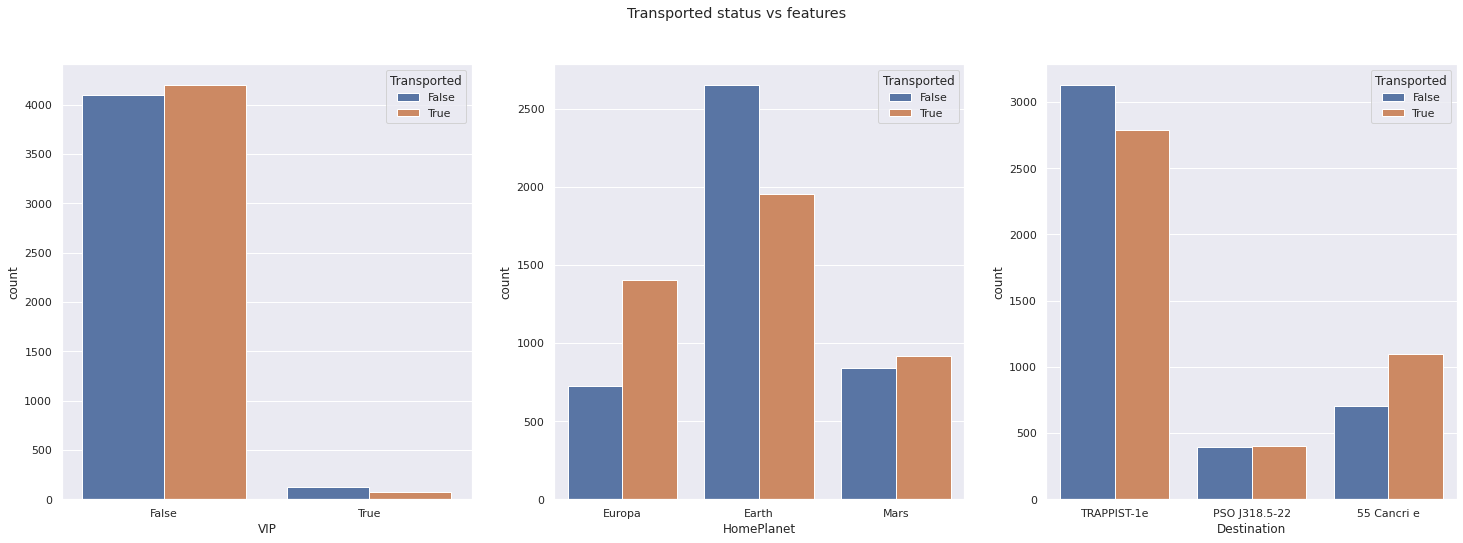

In [12]:
figure, ax =plt.subplots(1,3)
sb.countplot(data=df, x='VIP', hue='Transported', ax=ax[0])
sb.countplot(data=df, x='HomePlanet', hue='Transported', ax=ax[1])
sb.countplot(data=df, x='Destination', hue='Transported', ax=ax[2])
figure.suptitle('Transported status vs features')
figure.show()

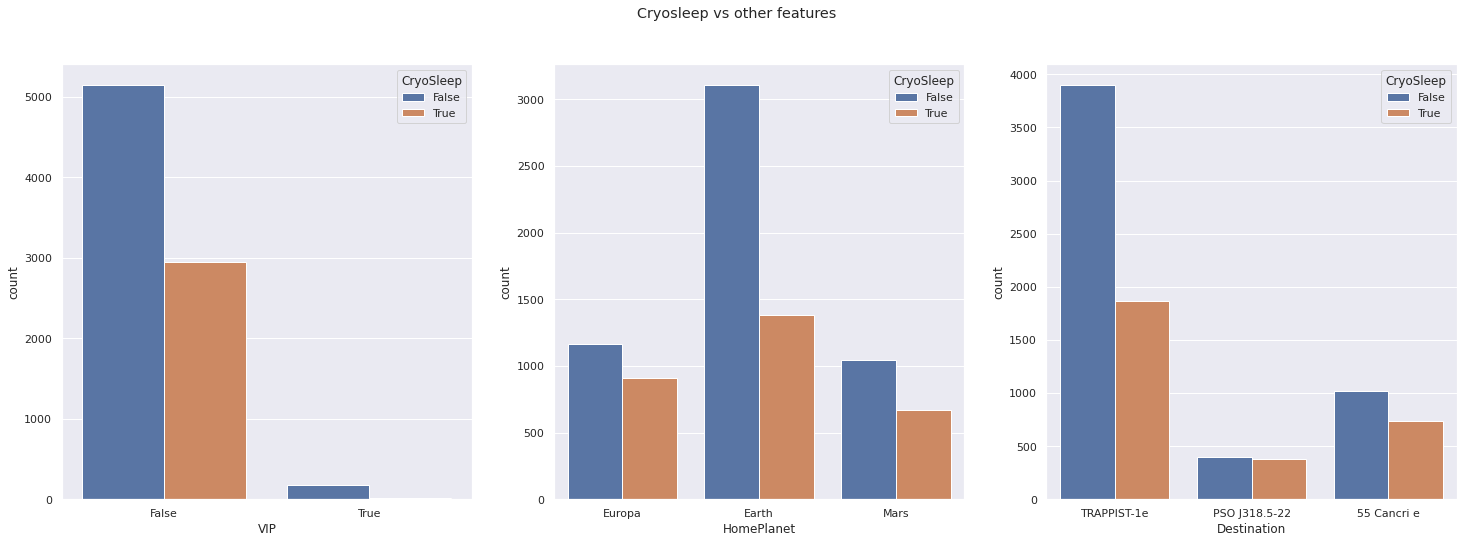

In [13]:
figure, ax =plt.subplots(1,3)
sb.countplot(data=df, x='VIP', hue='CryoSleep', ax=ax[0])
sb.countplot(data=df, x='HomePlanet', hue='CryoSleep', ax=ax[1])
sb.countplot(data=df, x='Destination', hue='CryoSleep', ax=ax[2])
figure.suptitle('Cryosleep vs other features')
figure.show()

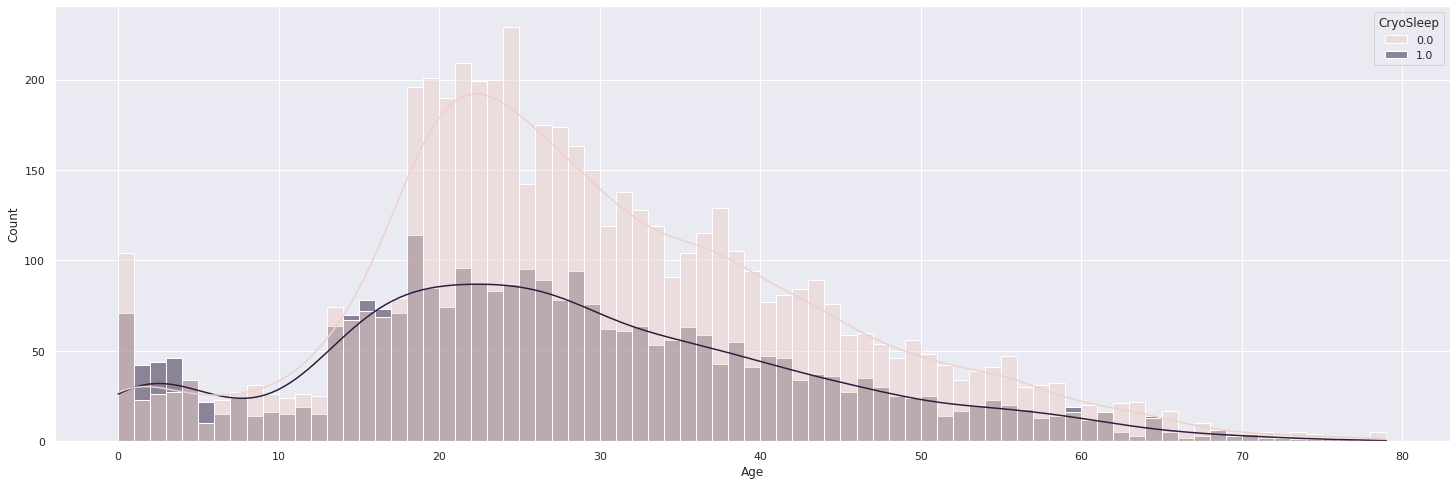

In [14]:
sb.set(rc={'figure.figsize':(25,8)})
sb.histplot(data=df, x='Age', hue='CryoSleep', binwidth=1, kde=True)
figure.suptitle('Cryosleep vs age')
plt.show()

In [15]:
df.loc[(df['CryoSleep']==True)&(df['VIP']==True)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
365,0402_01,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,True
589,0612_01,Europa,True,B/25/P,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Achyon Ranaly,True
1849,1976_03,Europa,True,B/82/S,55 Cancri e,26.0,True,0.0,0.0,0.0,0.0,0.0,Cellah Lansuffle,True
2394,2572_02,Europa,True,C/93/S,55 Cancri e,56.0,True,0.0,0.0,0.0,0.0,0.0,Spuri Suptibler,True
2675,2866_01,Europa,True,C/110/S,TRAPPIST-1e,36.0,True,0.0,0.0,0.0,0.0,0.0,Hadirk Wheededly,True
3104,3349_01,Europa,True,C/111/P,TRAPPIST-1e,73.0,True,0.0,0.0,0.0,NaN,0.0,Sargin Brakeril,True
4071,4348_01,Europa,True,B/142/P,TRAPPIST-1e,47.0,True,0.0,0.0,0.0,0.0,0.0,Krazet Conate,True
4155,4441_01,Europa,True,B/144/P,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,Kabiton Clinarfork,True
4401,4668_02,Europa,True,C/180/S,55 Cancri e,27.0,True,0.0,0.0,0.0,0.0,0.0,Sadrus Scerodbox,True
4503,4786_01,Europa,True,B/160/P,TRAPPIST-1e,46.0,True,0.0,0.0,0.0,0.0,0.0,Enibah Dratembid,True


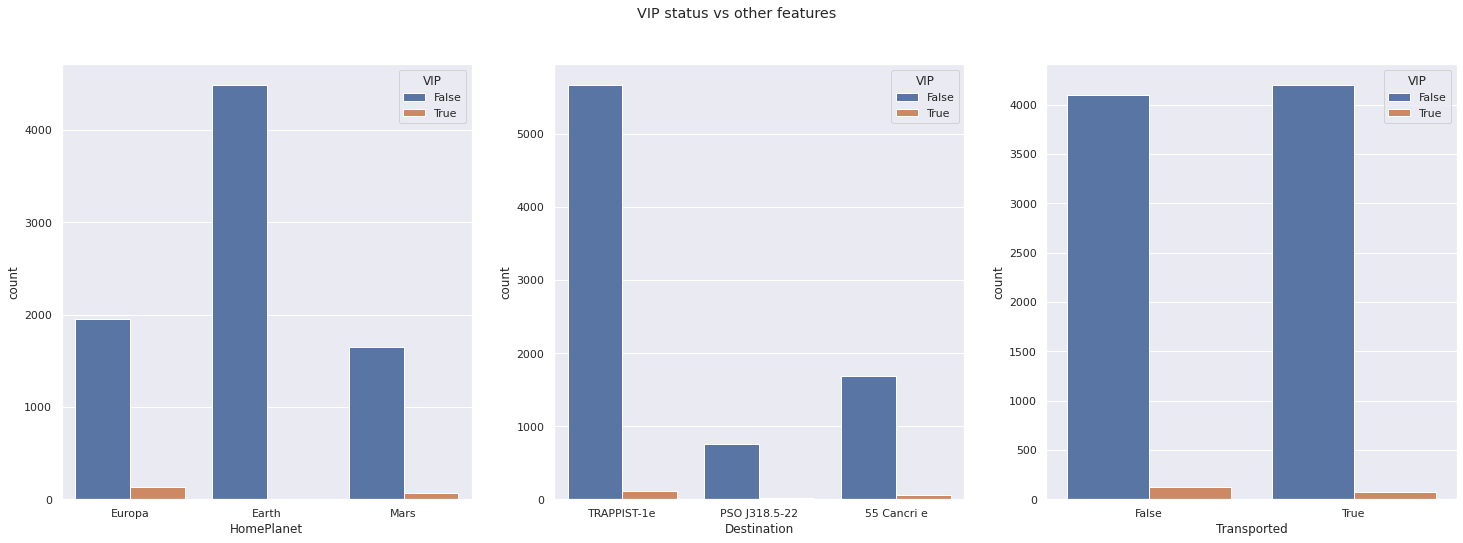

In [16]:
figure, ax =plt.subplots(1,3)
sb.countplot(data=df, x='HomePlanet', hue='VIP', ax=ax[0])
sb.countplot(data=df, x='Destination', hue='VIP', ax=ax[1])
sb.countplot(data=df, x='Transported', hue='VIP', ax=ax[2])
figure.suptitle('VIP status vs other features')
figure.show()

In [17]:
df.groupby(['VIP', 'HomePlanet']).size()
df.groupby(['VIP', 'Destination']).size()

VIP    Destination  
False  55 Cancri e      1692
       PSO J318.5-22     756
       TRAPPIST-1e      5667
True   55 Cancri e        65
       PSO J318.5-22      18
       TRAPPIST-1e       114
dtype: int64

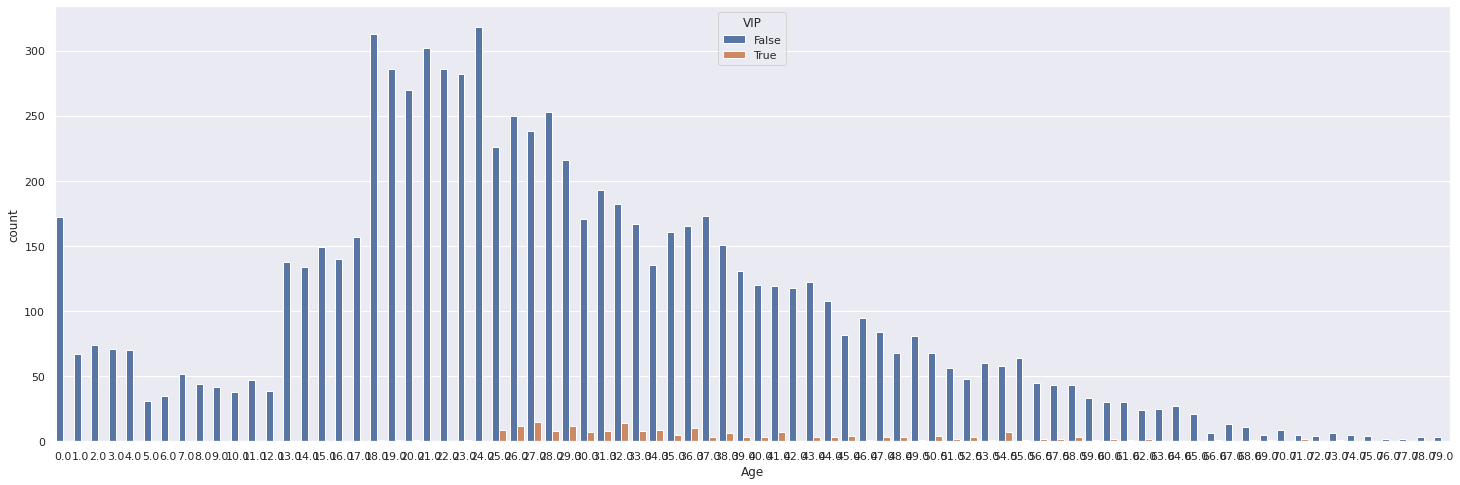

In [18]:
sb.set(rc={'figure.figsize':(25,8)})
sb.countplot(data=df, x='Age', hue='VIP')
figure.suptitle('VIP status vs age')
plt.show()

In [19]:
df[df['VIP']==True].nsmallest(1, 'Age')
df[((df['VIP']==True)& (df['Destination']=='PSO J318.5-22'))]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
356,0391_01,Europa,False,C/9/P,PSO J318.5-22,27.0,True,69.0,5728.0,0.0,0.0,987.0,Dabik Cowsearney,True
603,0633_01,Mars,False,D/25/P,PSO J318.5-22,31.0,True,629.0,0.0,0.0,150.0,0.0,Cakes Gread,False
796,0836_01,Mars,False,F/160/S,PSO J318.5-22,32.0,True,494.0,701.0,71.0,0.0,0.0,Set Butte,False
825,0878_01,Mars,False,D/31/S,PSO J318.5-22,37.0,True,381.0,0.0,3.0,447.0,0.0,Sceres Bancy,False
1448,1529_01,Europa,False,A/16/S,PSO J318.5-22,25.0,True,0.0,7069.0,0.0,45.0,282.0,Almino Slable,True
1644,1742_01,Mars,False,D/55/P,PSO J318.5-22,34.0,True,49.0,478.0,387.0,0.0,0.0,Anack Trad,False
2901,3134_01,Europa,False,C/119/S,PSO J318.5-22,62.0,True,0.0,4513.0,0.0,85.0,1437.0,Enifik Clughted,True
3480,3744_01,Mars,False,E/249/S,PSO J318.5-22,34.0,True,0.0,490.0,869.0,0.0,0.0,Denuts Ropie,True
4268,4543_01,Mars,False,F/936/P,PSO J318.5-22,20.0,True,14.0,0.0,59.0,1777.0,0.0,Quakes Winie,False
4275,4553_01,Europa,False,C/143/P,PSO J318.5-22,55.0,True,0.0,102.0,0.0,278.0,5353.0,Auvam Watuald,False


In [20]:
col = df.loc[:,'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,217.218527,426.336536,173.876298,301.711045,282.718056
True,473.615385,1811.393782,247.726804,760.710660,1234.856410


In [21]:
df.groupby(['HomePlanet', 'Destination']).size()
dfc= df.copy()

In [22]:
dfc[['Deck', 'Room', 'Side']] = dfc['Cabin'].str.split('/', expand = True)

col = dfc.loc[:,'RoomService':'VRDeck'].columns
dfc['Total'] = dfc.loc[:,col].sum(axis=1)

Text(0, 0.5, 'Mean expenditures per HomePlanet')

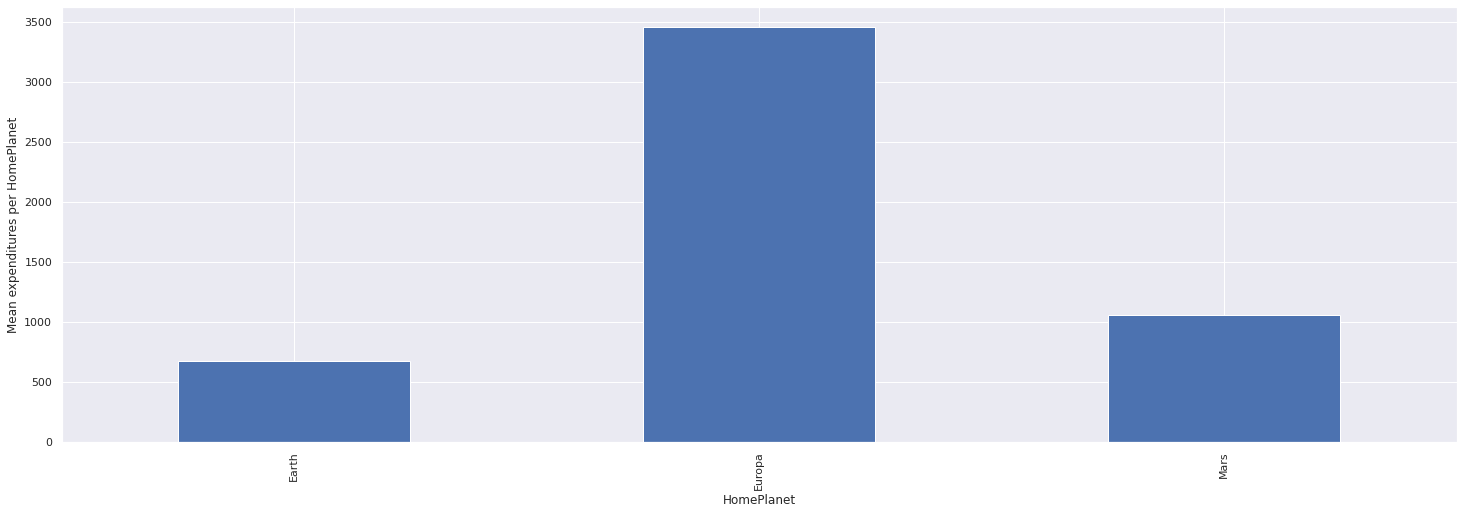

In [23]:
means = dfc.groupby(['HomePlanet']).mean()['Total']
ax = means.plot(kind = 'bar')
ax.set_ylabel('Mean expenditures per HomePlanet')

Text(0, 0.5, 'Mean expenditures per Side')

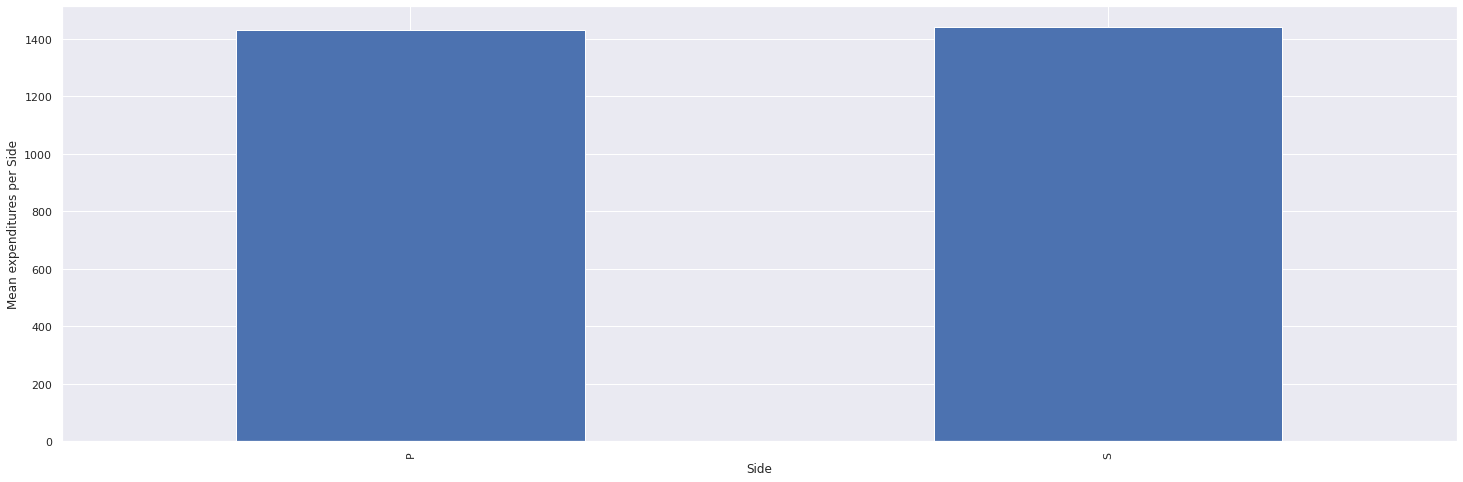

In [24]:
means = dfc.groupby(['Side']).mean()['Total']
ax = means.plot(kind = 'bar')
ax.set_ylabel('Mean expenditures per Side')

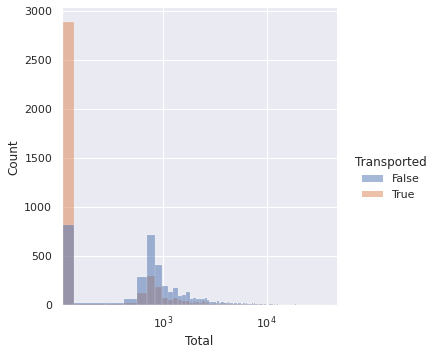

In [25]:
sb.displot(data=dfc, x='Total' , hue='Transported')
plt.xscale('log')#using log scale because of Total variance 
plt.show()

In [26]:
dfc.groupby(['CryoSleep', 'Total']).sum().reset_index().groupby('CryoSleep').mean()

,Total,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,,,,,,,,
False,3849.666667,68.941253,811.828547,1653.437772,628.189295,1126.601828,1101.309835,0.778503
True,0.000000,80983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2483.000000


In [27]:
dfc.loc[(dfc['CryoSleep']==False)&(dfc['Total']==0.0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,G,0,P,0.0
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True,E,0,S,0.0
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False,E,0,S,0.0
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,F,9,P,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,9157_06,Earth,False,G/1476/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Pamont Navages,False,G,1476,S,0.0
8637,9219_01,Earth,False,G/1487/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Daley Workmanson,False,G,1487,S,0.0
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,F,1888,P,0.0
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False,E,592,P,0.0


In [28]:
dfc[((dfc['VIP']==True)& (dfc['CryoSleep']==False)&(dfc['Total']==0.0))]
dfc[dfc['VIP']==False].nlargest(1, 'Total')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,Total
5722,6064_01,Europa,False,C/186/P,55 Cancri e,68.0,False,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,False,C,186,P,35987.0


In [29]:
dfc['Deck'].value_counts()
dfc.loc[dfc['Deck'] == 'T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,Total
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,Alraida Dingauge,False,T,0,P,1817.0
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,Mergak Headfair,False,T,1,P,7411.0
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,NaN,False,T,2,P,7412.0
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,Pent Sessiouse,True,T,3,P,3164.0
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,28.0,1362.0,Phacton Unsible,False,T,2,S,3778.0


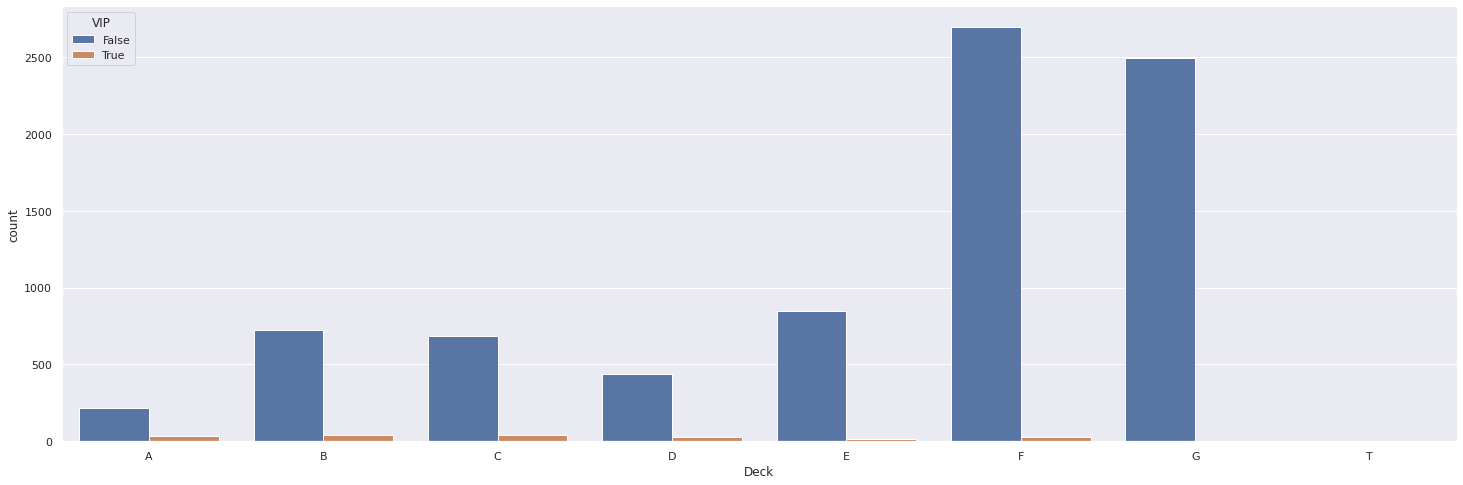

In [30]:
dfc.groupby(['Deck', 'VIP']).size()

sb.countplot(data=dfc, x='Deck', hue='VIP', order=['A','B','C','D','E','F','G','T'])
plt.show()

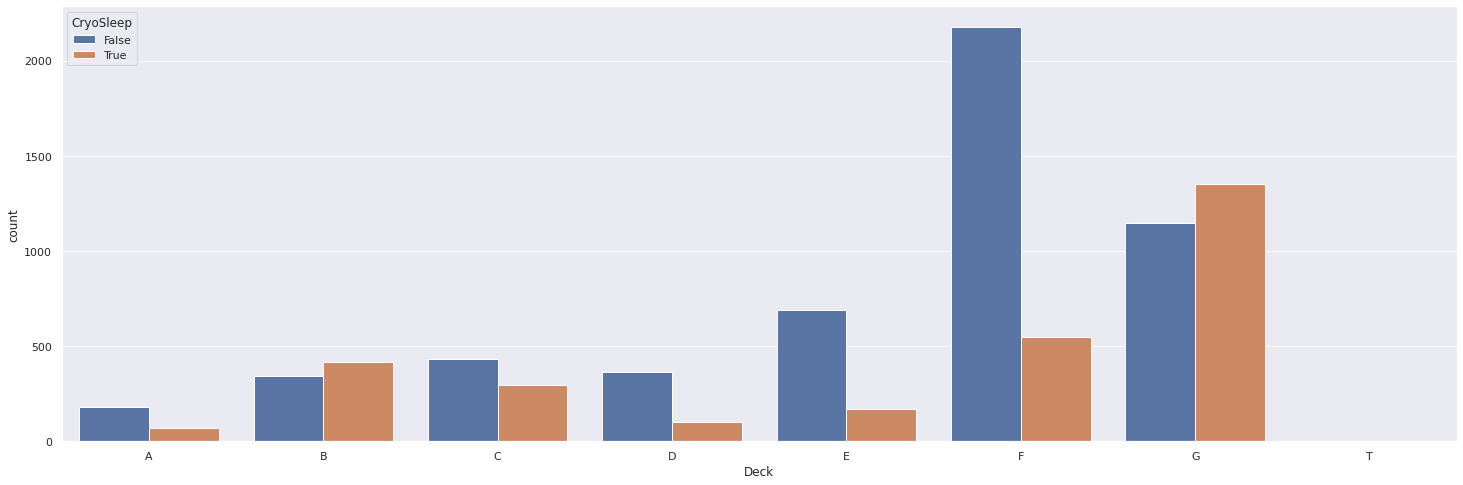

In [31]:
dfc.groupby(['Deck', 'CryoSleep']).size()

sb.countplot(data=dfc, x='Deck', hue='CryoSleep', order=['A','B','C','D','E','F','G','T'])
plt.show()

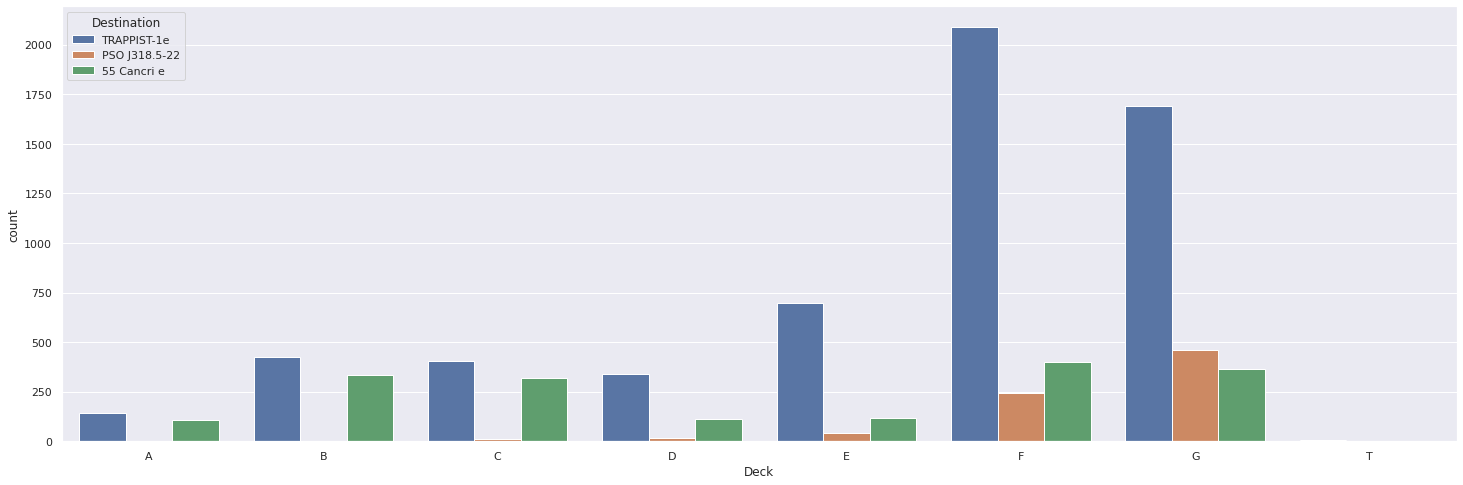

In [32]:
dfc.groupby(['Deck', 'Destination']).size()

sb.countplot(data=dfc, x='Deck', hue='Destination', order=['A','B','C','D','E','F','G','T'])
plt.show()

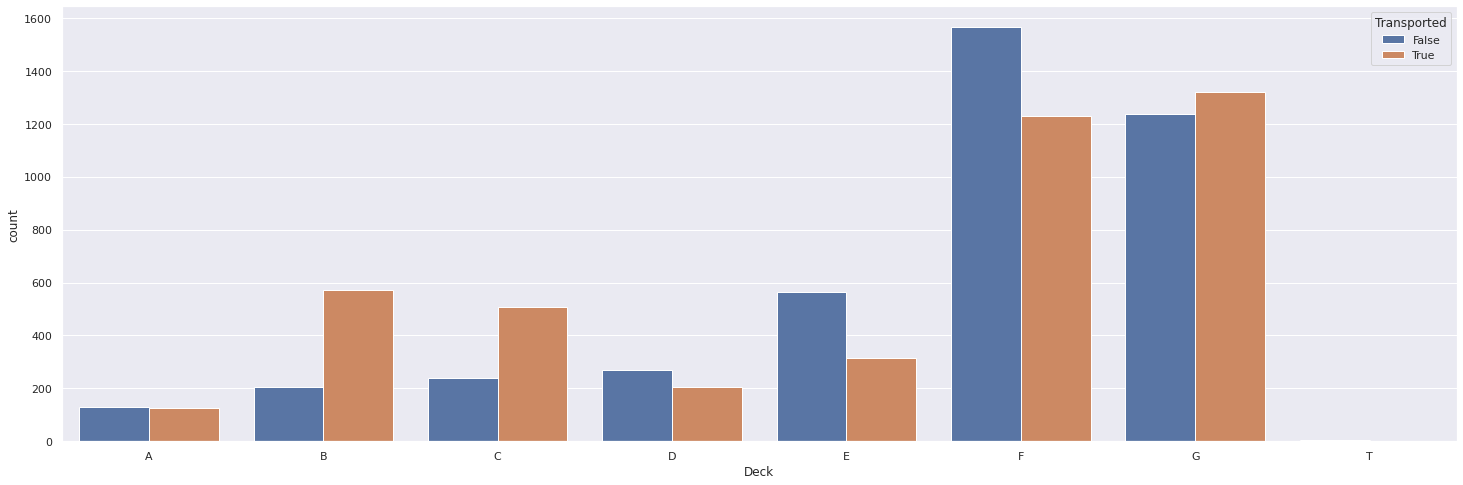

In [33]:
dfc.groupby(['Deck', 'Transported']).size()

sb.countplot(data=dfc, x='Deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.show()

In [34]:
dfc['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

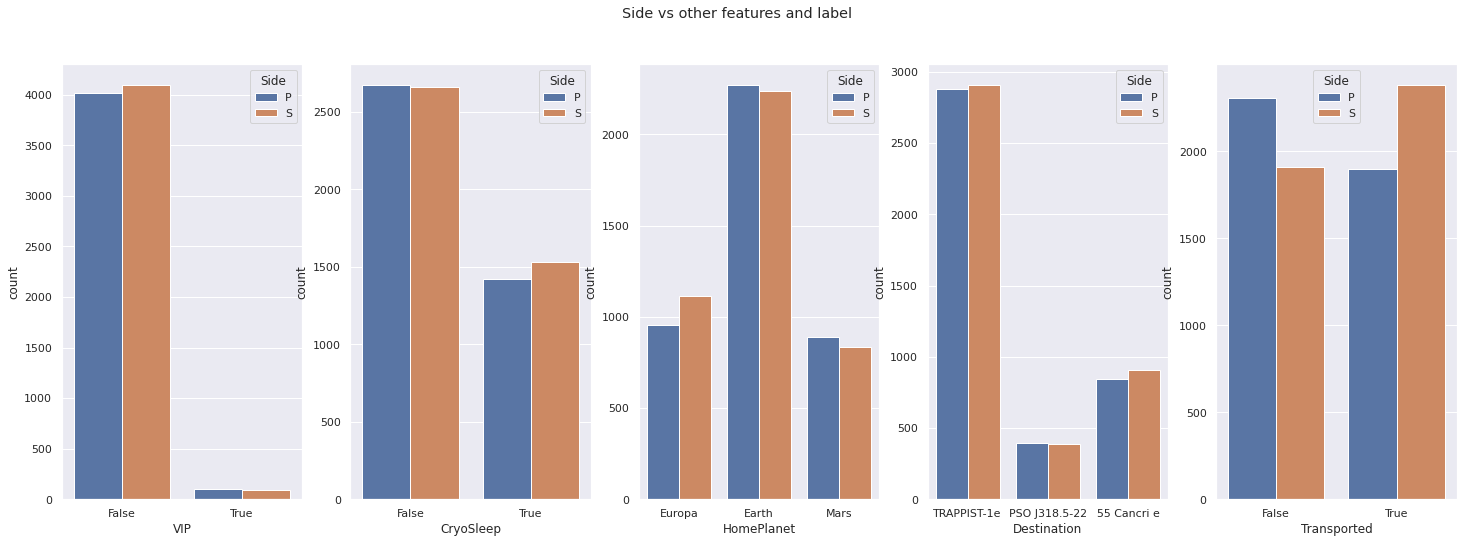

In [35]:
figure, ax =plt.subplots(1,5)
sb.countplot(data=dfc, x='VIP', hue='Side', ax=ax[0])
sb.countplot(data=dfc, x='CryoSleep', hue='Side', ax=ax[1])
sb.countplot(data=dfc, x='HomePlanet', hue='Side', ax=ax[2])
sb.countplot(data=dfc, x='Destination', hue='Side', ax=ax[3])
sb.countplot(data=dfc, x='Transported', hue='Side', ax=ax[4])
figure.suptitle('Side vs other features and label')
figure.show()

In [36]:
dfc

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room,Side,Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4637.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [38]:
y=df['Transported'].copy().astype(int)
X=df.drop('Transported', axis=1).copy()

data=pd.concat([X, dft], axis=0).reset_index(drop=True)

In [39]:

data[['PassengerGroup', 'PassengerNo']] = data['PassengerId'].str.split('_', expand = True)
data[['Deck', 'Room', 'Side']] = data['Cabin'].str.split('/', expand = True)
data[['First', 'Surname']] = data['Name'].str.split(' ', expand = True)

data = data.astype({'HomePlanet': 'category', 'Destination': 'category', 'CryoSleep': 'category', 'VIP': 'category', 'Side': 'category', 'Deck': 'category'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     12970 non-null  object  
 1   HomePlanet      12682 non-null  category
 2   CryoSleep       12660 non-null  category
 3   Cabin           12671 non-null  object  
 4   Destination     12696 non-null  category
 5   Age             12700 non-null  float64 
 6   VIP             12674 non-null  category
 7   RoomService     12707 non-null  float64 
 8   FoodCourt       12681 non-null  float64 
 9   ShoppingMall    12664 non-null  float64 
 10  Spa             12686 non-null  float64 
 11  VRDeck          12702 non-null  float64 
 12  Name            12676 non-null  object  
 13  PassengerGroup  12970 non-null  object  
 14  PassengerNo     12970 non-null  object  
 15  Deck            12671 non-null  category
 16  Room            12671 non-null  object  
 17  Side        

In [40]:
data[data['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,0064,02,E,3,S,Colatz,Keen
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,0119,01,A,0,P,Batan,Coning
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,0210,01,D,6,P,Arraid,Inicont
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,0242,01,F,46,S,Almone,Sté
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,0251,01,C,11,S,Diphah,Amsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders,8621,01,E,552,P,Vanley,Simmonders
12673,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson,8678,01,G,1399,S,Eilan,Kellson
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,8775,01,D,275,P,Raston,Maltorted
12852,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone,9025,01,G,1454,S,Ale,Whitersone


In [41]:

data.loc[(data['Deck']=='G') & (data['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'


data.loc[(data['Deck']=='A') & (data['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
data.loc[(data['Deck']=='B') & (data['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
data.loc[(data['Deck']=='C') & (data['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
data.loc[(data['Deck']=='T') & (data['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'

data[data['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,0064,02,E,3,S,Colatz,Keen
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,0210,01,D,6,P,Arraid,Inicont
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,0242,01,F,46,S,Almone,Sté
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,0321,01,F,61,S,Quites,Bache
365,0402_01,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,0402,01,D,15,S,Teron,Sageng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12542,8417_01,NaN,False,F/1617/S,TRAPPIST-1e,43.0,False,0.0,0.0,775.0,0.0,93.0,Luzel Bertsontry,8417,01,F,1617,S,Luzel,Bertsontry
12551,8435_01,NaN,NaN,F/1730/P,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,0.0,1216.0,NaN,8435,01,F,1730,P,NaN,NaN
12650,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders,8621,01,E,552,P,Vanley,Simmonders
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,8775,01,D,275,P,Raston,Maltorted


In [42]:
temp=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
tindex=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(temp.index)].index

data.loc[tindex,'HomePlanet']=data.iloc[tindex,:]['Surname'].map(lambda x: temp.idxmax(axis=1)[x])

In [43]:

temp=data.groupby(['PassengerGroup','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

tindex=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['PassengerGroup']).isin(temp.index)].index

data.loc[tindex,'HomePlanet']=data.iloc[tindex,:]['PassengerGroup'].map(lambda x: temp.idxmax(axis=1)[x])

data[data['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname


In [44]:
data[data['Side'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0012,01,NaN,NaN,NaN,Justie,Pooles
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,0101,01,NaN,NaN,NaN,Book,Trad
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,0110,01,NaN,NaN,NaN,Graviph,Aloubtled
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,0239,01,NaN,NaN,NaN,Diedow,Resty
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,0244,01,NaN,NaN,NaN,Froos,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12902,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,9138,01,NaN,NaN,NaN,Misamak,Trupistic
12941,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,9223,01,NaN,NaN,NaN,Weessh,Sun
12942,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,9223,02,NaN,NaN,NaN,Perit,Sun
12951,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,9238,05,NaN,NaN,NaN,Caseye,Emenez


In [45]:
temp=data.groupby(['PassengerGroup','Side'])['Side'].size().unstack().fillna(0)


idx=data[data['Side'].isna()][(data[data['Side'].isna()]['PassengerGroup']).isin(temp.index)].index


data.loc[idx,'Side']=data.iloc[idx,:]['PassengerGroup'].map(lambda x: temp.idxmax(axis=1)[x])

In [46]:
data.loc[(data['Deck'] =='G') & (data['VIP'].isna()), 'VIP'] = False

temp=data.groupby(['PassengerGroup','Deck'])['Deck'].size().unstack().fillna(0)



tindex=data[data['Deck'].isna()][(data[data['Deck'].isna()]['PassengerGroup']).isin(temp.index)].index

data.loc[tindex,'Deck']=data.iloc[tindex,:]['PassengerGroup'].map(lambda x: temp.idxmax(axis=1)[x])

In [47]:
data[data['Destination'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,0045,02,F,10,P,Mass,Chmad
128,0138_02,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,0138,02,E,5,P,Monah,Gambs
139,0152_01,Earth,False,F/32/P,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,0152,01,F,32,P,Andan,Estron
347,0382_01,Earth,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,0382,01,G,64,P,Blanie,Floydendley
430,0462_01,Earth,True,G/67/S,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,0462,01,G,67,S,Ronia,Sosanturney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,9022_03,Earth,True,F/1748/S,NaN,0.0,False,0.0,0.0,0.0,0.0,0.0,Erice Boyerson,9022,03,F,1748,S,Erice,Boyerson
12856,9039_01,Earth,True,G/1468/P,NaN,23.0,False,0.0,0.0,0.0,0.0,0.0,Nance Wilkinner,9039,01,G,1468,P,Nance,Wilkinner
12889,9095_01,Earth,False,G/1478/P,NaN,31.0,False,0.0,0.0,NaN,0.0,198.0,Lelah Reynoldez,9095,01,G,1478,P,Lelah,Reynoldez
12912,9155_01,Europa,False,C/304/P,NaN,17.0,False,149.0,2045.0,NaN,1872.0,0.0,Markar Amoutake,9155,01,C,304,P,Markar,Amoutake


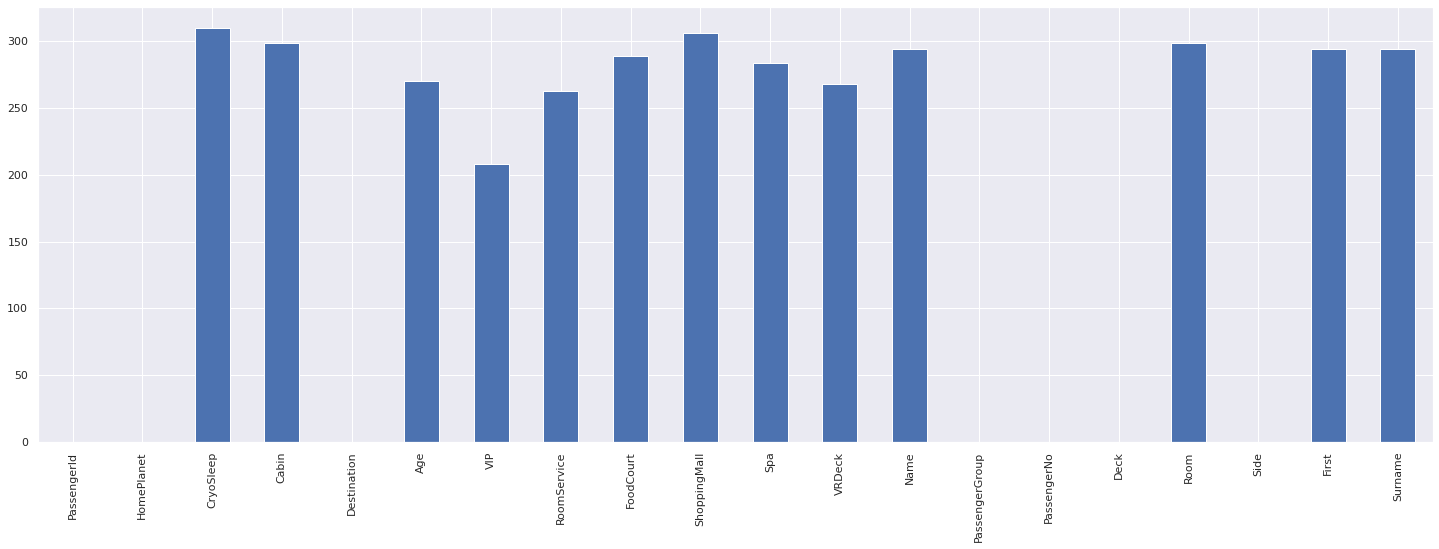

In [48]:
temp=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

idx=data[data['Destination'].isna()][(data[data['Destination'].isna()]['HomePlanet']).isin(temp.index)].index

data.loc[idx,'Destination']=data.iloc[idx,:]['HomePlanet'].map(lambda x: temp.idxmax(axis=1)[x])

data.isnull().sum().plot.bar()
plt.show()

In [49]:
data[data['CryoSleep'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,0099,02,G,12,P,Thewis,Connelson
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,0105,01,F,21,P,Carry,Cleachrand
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,0110,02,B,5,P,Aldeba,Bootious
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,0115,01,F,24,P,Rohs,Pead
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,0173,01,E,11,S,Hilip,Grifford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12688,8705_01,Mars,NaN,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen,8705,01,F,1790,P,Anch,Gen
12801,8925_06,Europa,NaN,C/295/P,TRAPPIST-1e,27.0,False,0.0,2182.0,7.0,2582.0,19.0,Zedarga Pabler,8925,06,C,295,P,Zedarga,Pabler
12902,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,9138,01,A,NaN,P,Misamak,Trupistic
12923,9182_01,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan,9182,01,F,1776,S,Garyan,Gainebergan


In [50]:
data.loc[data['RoomService'] > 0.0, 'CryoSleep'] = False
data.loc[data['FoodCourt'] > 0.0, 'CryoSleep'] = False
data.loc[data['ShoppingMall'] > 0.0, 'CryoSleep'] = False
data.loc[data['Spa'] > 0.0, 'CryoSleep'] = False
data.loc[data['VRDeck'] > 0.0, 'CryoSleep'] = False

data[data['CryoSleep'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,0099,02,G,12,P,Thewis,Connelson
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,0115,01,F,24,P,Rohs,Pead
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,Jeroy Cookson,0198,01,G,30,P,Jeroy,Cookson
266,0290_03,Europa,NaN,B/7/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Dhenar Excialing,0290,03,B,7,S,Dhenar,Excialing
392,0433_01,Europa,NaN,B/20/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Hekark Mormonized,0433,01,B,20,P,Hekark,Mormonized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11946,7130_05,Earth,NaN,G/1147/P,55 Cancri e,13.0,False,0.0,0.0,0.0,0.0,0.0,Stene Jacostarks,7130,05,G,1147,P,Stene,Jacostarks
11992,7237_01,Earth,NaN,G/1179/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Darrie Colleruces,7237,01,G,1179,S,Darrie,Colleruces
12295,7854_01,Earth,NaN,G/1262/P,55 Cancri e,17.0,False,0.0,0.0,0.0,0.0,0.0,Melara Mcguirez,7854,01,G,1262,P,Melara,Mcguirez
12688,8705_01,Mars,NaN,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen,8705,01,F,1790,P,Anch,Gen


In [51]:
col = data.loc[:,'RoomService':'VRDeck'].columns
foo = data['CryoSleep'] == True
data.loc[foo, col] = 0.0

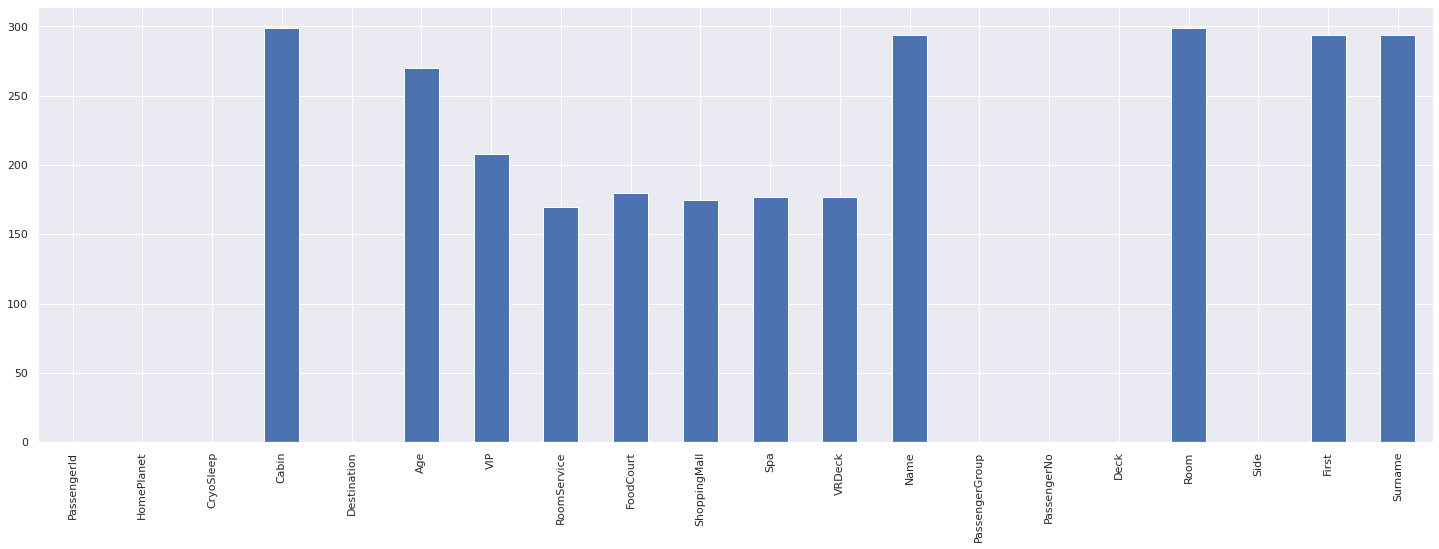

In [52]:
temp=data.groupby(['Deck','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)



idx=data[data['CryoSleep'].isna()][(data[data['CryoSleep'].isna()]['Deck']).isin(temp.index)].index


data.loc[idx,'CryoSleep']=data.iloc[idx,:]['Deck'].map(lambda x: temp.idxmax(axis=1)[x])

data.isnull().sum().plot.bar()
plt.show()

In [53]:
data[data['VIP'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,0036,01,F,8,S,Marina,Leodger
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,0165,01,F,37,P,Graven,Anche
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,0244,02,F,47,S,Tous,Sad
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,0593,01,D,24,P,Hon,Kra
582,0607_01,Europa,False,C/22/P,TRAPPIST-1e,37.0,NaN,27.0,654.0,10.0,881.0,9568.0,Dyonium Hontichre,0607,01,C,22,P,Dyonium,Hontichre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12767,8873_02,Europa,False,A/93/P,TRAPPIST-1e,36.0,NaN,0.0,3973.0,18.0,5188.0,543.0,NaN,8873,02,A,93,P,NaN,NaN
12770,8875_02,Europa,False,C/330/S,TRAPPIST-1e,32.0,NaN,26.0,1708.0,0.0,3993.0,481.0,Alar Oillicaly,8875,02,C,330,S,Alar,Oillicaly
12780,8895_01,Europa,True,C/294/P,TRAPPIST-1e,39.0,NaN,0.0,0.0,0.0,0.0,0.0,Astrak Hossive,8895,01,C,294,P,Astrak,Hossive
12869,9058_01,Mars,False,NaN,TRAPPIST-1e,38.0,NaN,784.0,0.0,42.0,38.0,10.0,Hammet Muff,9058,01,A,NaN,P,Hammet,Muff


In [54]:
data.loc[(data['HomePlanet'] =='Earth') & (data['VIP'].isna()), 'VIP'] = False

data.loc[(data['Age']<18) & (data['VIP'].isna()), 'VIP'] = False

In [55]:
data.loc[data['VIP'].isna(),'VIP']=False

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     12970 non-null  object  
 1   HomePlanet      12970 non-null  category
 2   CryoSleep       12970 non-null  category
 3   Cabin           12671 non-null  object  
 4   Destination     12970 non-null  category
 5   Age             12700 non-null  float64 
 6   VIP             12970 non-null  category
 7   RoomService     12800 non-null  float64 
 8   FoodCourt       12790 non-null  float64 
 9   ShoppingMall    12795 non-null  float64 
 10  Spa             12793 non-null  float64 
 11  VRDeck          12793 non-null  float64 
 12  Name            12676 non-null  object  
 13  PassengerGroup  12970 non-null  object  
 14  PassengerNo     12970 non-null  object  
 15  Deck            12970 non-null  category
 16  Room            12671 non-null  object  
 17  Side        

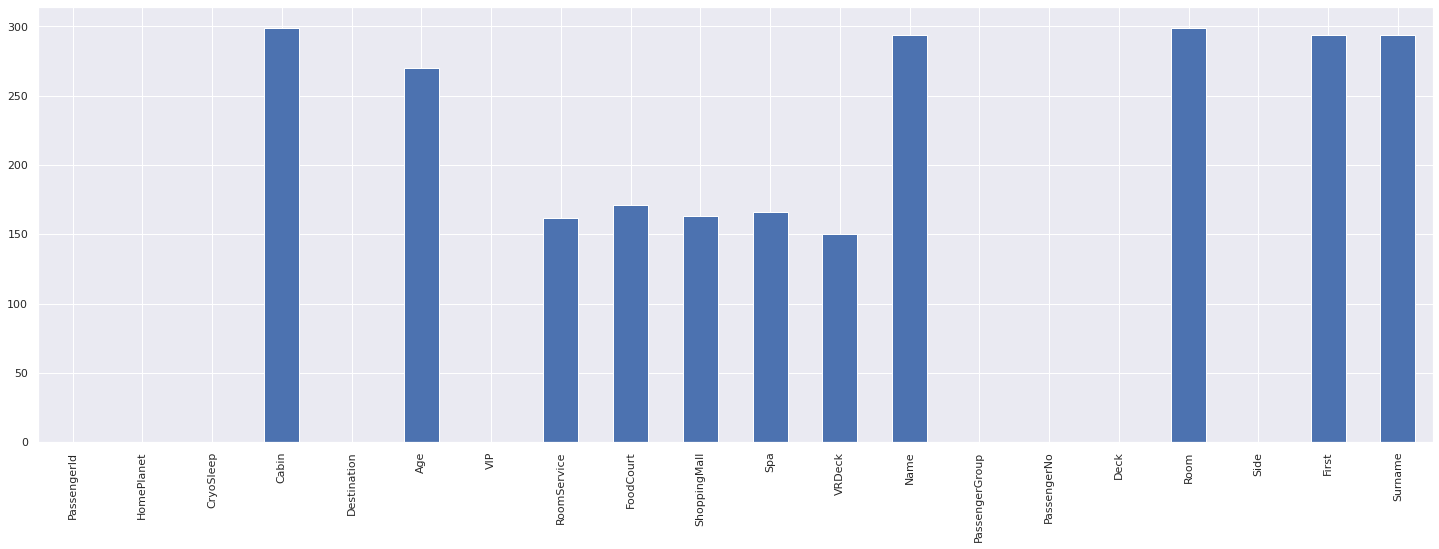

In [56]:
col = data.loc[:,'RoomService':'VRDeck'].columns


data.loc[data['Age'] < 13.0, col] = 0.0

data.isnull().sum().plot.bar()
plt.show()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     12970 non-null  object  
 1   HomePlanet      12970 non-null  category
 2   CryoSleep       12970 non-null  category
 3   Cabin           12671 non-null  object  
 4   Destination     12970 non-null  category
 5   Age             12700 non-null  float64 
 6   VIP             12970 non-null  category
 7   RoomService     12808 non-null  float64 
 8   FoodCourt       12799 non-null  float64 
 9   ShoppingMall    12807 non-null  float64 
 10  Spa             12804 non-null  float64 
 11  VRDeck          12820 non-null  float64 
 12  Name            12676 non-null  object  
 13  PassengerGroup  12970 non-null  object  
 14  PassengerNo     12970 non-null  object  
 15  Deck            12970 non-null  category
 16  Room            12671 non-null  object  
 17  Side        

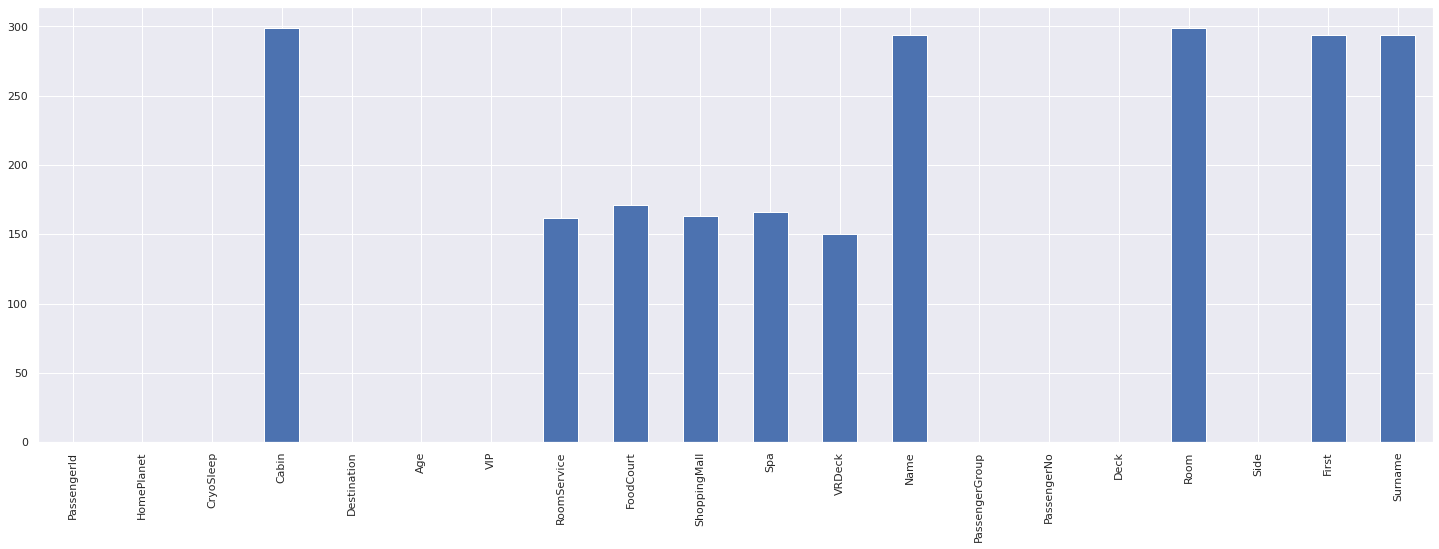

In [58]:
rows=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','Destination'])['Age'].transform(lambda x: x.fillna(x.mean()))[rows]

data.isnull().sum().plot.bar()
plt.show()

In [59]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Destination','Age','VIP'])[col].transform(lambda x: x.fillna(x.mean()))[rows]

In [60]:
data[(data['FoodCourt'].isnull()) | (data['RoomService'].isnull()) |(data['ShoppingMall'].isnull()) | (data['Spa'].isnull()) | (data['VRDeck'].isnull())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNo,Deck,Room,Side,First,Surname
3452,3714_02,Mars,False,D/116/S,PSO J318.5-22,33.0,False,33.0,397.0,354.0,NaN,0.0,Cowl Harta,3714,02,D,116,S,Cowl,Harta
4336,4623_01,Europa,False,C/146/P,PSO J318.5-22,34.0,True,0.0,NaN,21.0,7.0,16.0,Sadrix Repumparte,4623,01,C,146,P,Sadrix,Repumparte
4899,5223_01,Mars,False,F/1002/S,55 Cancri e,47.0,False,275.0,0.0,NaN,24.0,0.0,Munda Ble,5223,01,F,1002,S,Munda,Ble
5884,6234_01,Mars,False,F/1287/P,PSO J318.5-22,40.0,True,301.0,0.0,1310.0,4.0,NaN,Sters Bun,6234,01,F,1287,P,Sters,Bun
7568,8088_02,Mars,False,F/1670/P,TRAPPIST-1e,23.0,True,3.0,0.0,0.0,1677.0,NaN,Varkes Kart,8088,02,F,1670,P,Varkes,Kart
7797,8322_01,Europa,False,NaN,PSO J318.5-22,45.0,True,NaN,49.0,0.0,4864.0,3902.0,Hamelik Briouse,8322,01,C,NaN,S,Hamelik,Briouse
9431,1502_02,Europa,False,C/54/P,55 Cancri e,57.0,True,1.0,3637.0,0.0,3.0,NaN,Avitons Donotaked,1502,02,C,54,P,Avitons,Donotaked
10913,4802_02,Earth,False,G/774/P,PSO J318.5-22,74.0,False,568.0,17.0,0.0,NaN,1.0,Evendy Lambucketty,4802,02,G,774,P,Evendy,Lambucketty
11085,5219_02,Mars,False,F/1001/S,PSO J318.5-22,40.0,False,162.0,0.0,1599.0,NaN,0.0,Tifet Minen,5219,02,F,1001,S,Tifet,Minen


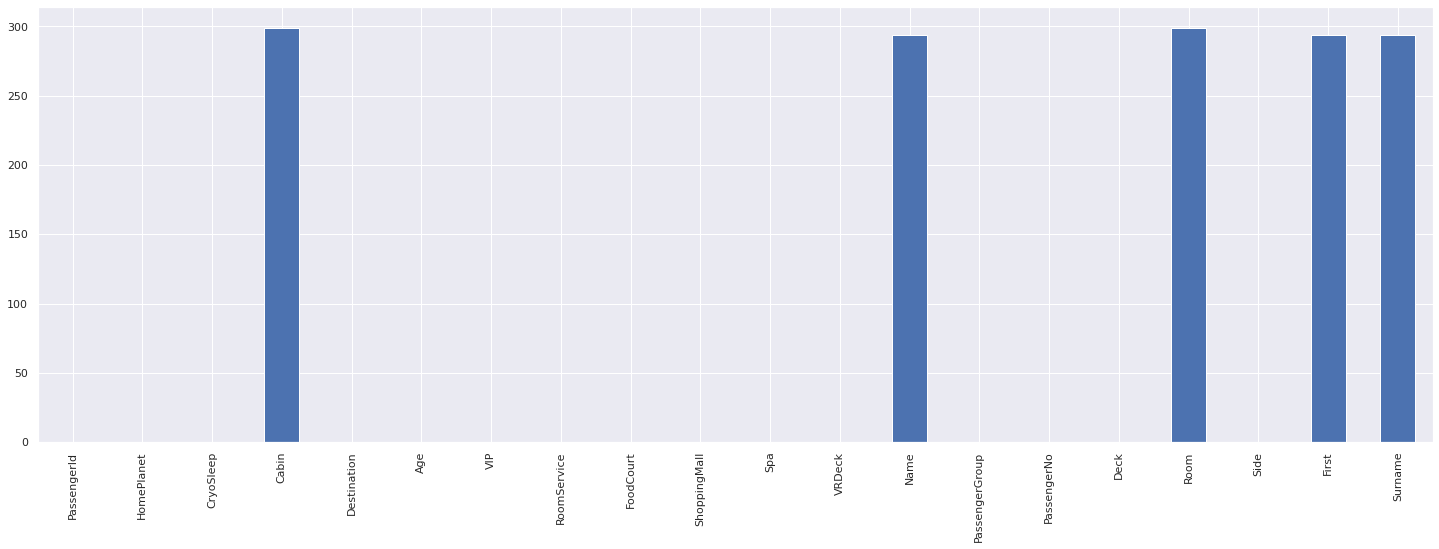

In [61]:
data.loc[data['FoodCourt'].isna(),'FoodCourt']=0.0
data.loc[data['RoomService'].isna(),'RoomService']=0.0
data.loc[data['ShoppingMall'].isna(),'ShoppingMall']=0.0
data.loc[data['Spa'].isna(),'Spa']=0.0
data.loc[data['VRDeck'].isna(),'VRDeck']=0.0

data.isnull().sum().plot.bar()
plt.show()

In [62]:
data.info()
data['Total'] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     12970 non-null  object  
 1   HomePlanet      12970 non-null  category
 2   CryoSleep       12970 non-null  category
 3   Cabin           12671 non-null  object  
 4   Destination     12970 non-null  category
 5   Age             12970 non-null  float64 
 6   VIP             12970 non-null  category
 7   RoomService     12970 non-null  float64 
 8   FoodCourt       12970 non-null  float64 
 9   ShoppingMall    12970 non-null  float64 
 10  Spa             12970 non-null  float64 
 11  VRDeck          12970 non-null  float64 
 12  Name            12676 non-null  object  
 13  PassengerGroup  12970 non-null  object  
 14  PassengerNo     12970 non-null  object  
 15  Deck            12970 non-null  category
 16  Room            12671 non-null  object  
 17  Side        

In [63]:
X_train=data[data['PassengerId'].isin(df['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(dft['PassengerId'].values)].copy()

In [64]:
test_id= X_test['PassengerId']

In [65]:
X_train.drop(['PassengerId', 'Cabin', 'Name', 'PassengerNo', 'Room','First','Surname'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Name', 'PassengerNo', 'Room','First','Surname'], axis=1, inplace=True)

In [66]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total']:
    X_train[col]=np.log(1+X_train[col])
    X_test[col]=np.log(1+X_test[col])

In [67]:
XT_train, XT_test, y_train, y_test = train_test_split(X_train,y, random_state=104, train_size=0.75, shuffle=True)

In [68]:
cat_features = ['CryoSleep', 'VIP','HomePlanet', 'Destination', 'Deck', 'Side','PassengerGroup']

In [69]:
XT_train['PassengerGroup'] = pd.to_numeric(XT_train['PassengerGroup'])
XT_test['PassengerGroup'] = pd.to_numeric(XT_test['PassengerGroup'])
X_test['PassengerGroup'] = pd.to_numeric(X_test['PassengerGroup'])

In [70]:
import lightgbm as lgb

fit_params={"early_stopping_rounds":15, 
            "eval_metric" : 'auc', 
            "eval_set" : [(XT_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': cat_features
           }

lgbmClass = lgb.LGBMClassifier(num_leaves= 30, max_depth=-1, 
                         random_state=42, 
                         silent=True,
                         n_jobs=10, 
                         n_estimators=1000,
                         colsample_bytree=0.8,
                         subsample=0.8,
                         learning_rate=0.03)

In [71]:
lgbmClass.fit(XT_train, y_train, **fit_params)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[100]	valid's auc: 0.886211	valid's binary_logloss: 0.422287


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03, n_estimators=1000,
               n_jobs=10, num_leaves=30, random_state=42, silent=True,
               subsample=0.8)

In [72]:
y_pred = lgbmClass.predict(X_test)  

In [73]:
from catboost import CatBoostClassifier, Pool

test_pool = Pool(XT_test, y_test,cat_features=cat_features)

catClass = CatBoostClassifier(iterations=480,verbose=1, cat_features=cat_features)

In [74]:
catClass.fit(XT_train, y_train,
    cat_features=cat_features,
    eval_set=test_pool,
    plot=True,
    verbose_eval=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.06929
0:	learn: 0.6602291	test: 0.6598147	best: 0.6598147 (0)	total: 77ms	remaining: 36.9s
1:	learn: 0.6324618	test: 0.6331802	best: 0.6331802 (1)	total: 93.7ms	remaining: 22.4s
2:	learn: 0.6069042	test: 0.6076349	best: 0.6076349 (2)	total: 107ms	remaining: 17s
3:	learn: 0.5857243	test: 0.5868444	best: 0.5868444 (3)	total: 122ms	remaining: 14.6s
4:	learn: 0.5652704	test: 0.5664794	best: 0.5664794 (4)	total: 144ms	remaining: 13.7s
5:	learn: 0.5471740	test: 0.5488570	best: 0.5488570 (5)	total: 159ms	remaining: 12.6s
6:	learn: 0.5408125	test: 0.5429490	best: 0.5429490 (6)	total: 168ms	remaining: 11.4s
7:	learn: 0.5282315	test: 0.5304924	best: 0.5304924 (7)	total: 183ms	remaining: 10.8s
8:	learn: 0.5200022	test: 0.5230712	best: 0.5230712 (8)	total: 200ms	remaining: 10.5s
9:	learn: 0.5112071	test: 0.5151293	best: 0.5151293 (9)	total: 214ms	remaining: 10s
10:	learn: 0.5043449	test: 0.5089445	best: 0.5089445 (10)	total: 227ms	remaining: 9.67s
11:	learn: 0.4961185	test: 

In [75]:
X_test.head()

y_pred = catClass.predict(X_test)  

In [76]:
pred = pd.DataFrame(y_pred,columns=['Transported'])
pred['Transported'] = pred['Transported'].astype(bool)
sub = pd.concat([test_id,pred.round()],axis=1)
sub = sub.iloc[: , 1:]
sub = pd.concat([dft['PassengerId'],pred.round()],axis=1)
sub.set_index('PassengerId',inplace=True)
sub.to_csv(f"submission.csv")